## Cricket Analysis 

#### Transforming and cleaning the csv files as per requirement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [2]:
df_bat = pd.read_csv(r"../processed_data/ODIbatting_clean.csv")
df_bowl = pd.read_csv(r"../processed_data/ODIbowling_clean.csv")

In [3]:
df_bat.head()

,pid,Player,Mat,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,debut,retire,team1,team2,team3
0,SRTendulkar19892012,SR Tendulkar,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1,1989,2012,INDIA,NaN,NaN
1,KCSangakkara20002015,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,2000,2015,Asia,ICC,SL
2,RTPonting19952012,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,1995,2012,AUS,ICC,NaN
3,STJayasuriya19892011,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,1989,2011,Asia,SL,NaN
4,DPMDJayawardene19982015,DPMD Jayawardene,448,418,39,12650,144,33.37,16020,78.96,19,77,28,0,1998,2015,Asia,SL,NaN


In [4]:
df_bowl.head()

,pid,Player,Mat,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,debut,retire,team1,team2,team3
0,MMuralitharan19932011,M Muralitharan,350,341,18811,12326,534,23.08,3.93,35.2,15,10,7,30,1993,2011,Asia,ICC,SL
1,WasimAkram19842003,Wasim Akram,356,351,18186,11812,502,23.52,3.89,36.2,17,6,5,15,1984,2003,PAK,NaN,NaN
2,WaqarYounis19892003,Waqar Younis,262,258,12698,9919,416,23.84,4.68,30.5,14,13,7,36,1989,2003,PAK,NaN,NaN
3,WPUJCVaas19942008,WPUJC Vaas,322,320,15775,11014,400,27.53,4.18,39.4,9,4,8,19,1994,2008,Asia,SL,NaN
4,ShahidAfridi19962015,Shahid Afridi,398,372,17670,13632,395,34.51,4.62,44.7,4,9,7,12,1996,2015,Asia,ICC,PAK


In [5]:
df_bat.columns

Index(['pid', 'Player', 'Mat', 'Inns_bat', 'NO', 'Runs_scored', 'HS',
       'Avg_bat', 'BF', 'SR_bat', '100', '50', '0', 'HS_no', 'debut', 'retire',
       'team1', 'team2', 'team3'],
      dtype='object')

In [6]:
#checking for batters with same name have same pid

df_batters = df_bat[["pid","Player","Mat","debut","retire","team1","team2","team3"]].copy()
df_batters[df_batters["Player"].duplicated(keep=False)].sort_values("Player")

,pid,Player,Mat,debut,retire,team1,team2,team3
2497,AshfaqAhmed19941994,Ashfaq Ahmed,3,1994,1994,PAK,NaN,NaN
732,AshfaqAhmed20182019,Ashfaq Ahmed,16,2018,2019,UAE,NaN,NaN
2148,AsifIqbal20152015,Asif Iqbal,1,2015,2015,NaN,UAE,NaN
749,AsifIqbal19731979,Asif Iqbal,10,1973,1979,PAK,NaN,NaN
2308,JunaidSiddique20192019,Junaid Siddique,3,2019,2019,UAE,NaN,NaN
346,JunaidSiddique20072011,Junaid Siddique,54,2007,2011,BDESH,NaN,NaN
1913,MJSmith19991999,MJ Smith,5,1999,1999,SCOT,NaN,NaN
1409,MJSmith19731974,MJ Smith,5,1973,1974,ENG,NaN,NaN
972,MohammadShahzad20142016,Mohammad Shahzad,6,2014,2016,UAE,NaN,NaN
171,MohammadShahzad20092019,Mohammad Shahzad,84,2009,2019,AFG,NaN,NaN


In [7]:
#checking for bowlers with same name have same pid

df_bowlers = df_bowl[["pid","Player","Mat","debut","retire","team1","team2","team3"]].copy()
df_bowlers[df_bowlers["Player"].duplicated(keep=False)].sort_values("Player")

,pid,Player,Mat,debut,retire,team1,team2,team3
1118,AshfaqAhmed20182019,Ashfaq Ahmed,16,2018,2019,UAE,NaN,NaN
1609,AshfaqAhmed19941994,Ashfaq Ahmed,3,1994,1994,PAK,NaN,NaN
662,AsifIqbal19731979,Asif Iqbal,10,1973,1979,PAK,NaN,NaN
1611,AsifIqbal20152015,Asif Iqbal,1,2015,2015,NaN,UAE,NaN
1702,JunaidSiddique20072011,Junaid Siddique,54,2007,2011,BDESH,NaN,NaN
913,JunaidSiddique20192019,Junaid Siddique,3,2019,2019,UAE,NaN,NaN
2471,MJSmith19991999,MJ Smith,5,1999,1999,SCOT,NaN,NaN
2470,MJSmith19731974,MJ Smith,5,1973,1974,ENG,NaN,NaN
2268,MohammadShahzad20092019,Mohammad Shahzad,84,2009,2019,AFG,NaN,NaN
880,MohammadShahzad20142016,Mohammad Shahzad,6,2014,2016,UAE,NaN,NaN


In [8]:
print(df_bowlers.shape[0]+df_batters.shape[0],"rows in total")

5082 rows in total


In [9]:
Players = pd.concat([df_batters,df_bowlers],ignore_index=True)

In [10]:
Players["pid"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5077     True
5078     True
5079     True
5080     True
5081     True
Name: pid, Length: 5082, dtype: bool

In [11]:
Players[Players["pid"].duplicated(keep=False)].sort_values("pid")

,pid,Player,Mat,debut,retire,team1,team2,team3
2518,AADonald19912003,AA Donald,164,1991,2003,SA,NaN,NaN
1276,AADonald19912003,AA Donald,164,1991,2003,SA,NaN,NaN
2007,AAMallett19711975,AA Mallett,9,1971,1975,AUS,NaN,NaN
3316,AAMallett19711975,AA Mallett,9,1971,1975,AUS,NaN,NaN
618,AAMulla20062009,AA Mulla,24,2006,2009,CAN,NaN,NaN
...,...,...,...,...,...,...,...,...
3689,ZulfiqarBabar20142015,Zulfiqar Babar,5,2014,2015,PAK,NaN,NaN
1934,Zulqarnain19851989,Zulqarnain,16,1985,1989,PAK,NaN,NaN
5080,Zulqarnain19851989,Zulqarnain,16,1985,1989,PAK,NaN,NaN
1583,ZulqarnainHaider20102010,Zulqarnain Haider,4,2010,2010,PAK,NaN,NaN


In [12]:
Players = Players.drop_duplicates().reset_index(drop=True)
Players = Players.rename({"Player":"player_name"},axis=1)
Players

,pid,player_name,Mat,debut,retire,team1,team2,team3
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,NaN,NaN
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,Asia,ICC,SL
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,ICC,NaN
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,Asia,SL,NaN
4,DPMDJayawardene19982015,DPMD Jayawardene,448,1998,2015,Asia,SL,NaN
...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,NaN,NaN
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,NaN,NaN
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,NaN,NaN
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,NaN,NaN


In [13]:
# Players[Players["team1"]=='Afr']

In [14]:
def assign_country(row):
    countries = ['SA','INDIA', 'CAN', 'HKG', 'ZIM', 'NAM', 'SCOT',
                                 'OMAN', 'ENG', 'EAf', 'USA', 'BDESH', 'KENYA',
                                 'NL',  'PAK', 'PNG', 'SL', 'WI', 'AFG', 'IRE', 'UAE',
                                 'AUS', 'NZ', 'BMUDA', 'NEPAL']
    for team in [row["team1"],row["team2"], row["team3"]]:
        if team in countries:
            return team

Players["Country"] = Players.apply(assign_country, axis=1)
Players = Players.drop(columns=["team1","team2","team3"],axis=1)

In [15]:
Players.head(3)

,pid,player_name,Mat,debut,retire,Country
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,SL
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS


In [16]:
unique_batters = df_batters[df_batters["pid"].isin(df_bowlers["pid"])]
print(unique_batters.shape)

#since 2500 batters are in bowlers all the batters data is included in bowlers data

(2500, 8)


In [17]:
batting_stats = df_bat[['pid', 'Inns_bat', 'NO', 'Runs_scored', 'HS',
       'Avg_bat', 'BF', 'SR_bat', '100', '50', '0', 'HS_no']]
bowling_stats = df_bowl[['pid', 'Inns_bowl', 'Balls_bowled', 'Runs_given',
       'Wkts_taken', 'Avg_bowl', 'Econ_bowl', 'SR_bowl', '4wkt', '5wkt',
       'BBwkts', 'BBruns']]

In [18]:
df_bowl.columns

Index(['pid', 'Player', 'Mat', 'Inns_bowl', 'Balls_bowled', 'Runs_given',
       'Wkts_taken', 'Avg_bowl', 'Econ_bowl', 'SR_bowl', '4wkt', '5wkt',
       'BBwkts', 'BBruns', 'debut', 'retire', 'team1', 'team2', 'team3'],
      dtype='object')

In [19]:
#the data is now split into 3 tables
#-player table
#-batting table
#-bowling table

## Player data integration and Feature engineering

#### Merging all the players as a single dataframe

In [20]:
player_stats = Players.merge(batting_stats,on='pid',how='left').merge(bowling_stats,on='pid',how='left')

In [21]:
player_stats.isna().sum()

pid              0
player_name      0
Mat              0
debut            0
retire           0
Country          0
Inns_bat        82
NO              82
Runs_scored     82
HS              82
Avg_bat         82
BF              82
SR_bat          82
100             82
50              82
0               82
HS_no           82
Inns_bowl        0
Balls_bowled     0
Runs_given       0
Wkts_taken       0
Avg_bowl         0
Econ_bowl        0
SR_bowl          0
4wkt             0
5wkt             0
BBwkts           0
BBruns           0
dtype: int64

In [22]:
player_stats[['Inns_bat', 'NO', 'Runs_scored', 'HS', 'Avg_bat', 'BF',
       'SR_bat', '100', '50', '0', 'HS_no']] = player_stats[['Inns_bat', 'NO', 'Runs_scored', 'HS', 'Avg_bat', 'BF',
       'SR_bat', '100', '50', '0', 'HS_no']].fillna(0)

In [23]:
player_stats

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,...,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,...,8054,6850,154,44.48,5.10,52.2,4,2,5,32
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,SL,380.0,41.0,14234.0,169.0,...,0,0,0,0.00,0.00,0.0,0,0,0,0
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,365.0,39.0,13704.0,164.0,...,150,104,3,34.66,4.16,50.0,0,0,1,12
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,SL,433.0,18.0,13430.0,189.0,...,14874,11871,323,36.75,4.78,46.0,8,4,6,29
4,DPMDJayawardene19982015,DPMD Jayawardene,448,1998,2015,SL,418.0,39.0,12650.0,144.0,...,593,563,8,70.37,5.69,74.1,0,0,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,0.0,0.0,0.0,0.0,...,54,43,0,0.00,4.77,0.0,0,0,0,0
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,0.0,0.0,0.0,0.0,...,12,17,0,0.00,8.50,0.0,0,0,0,0
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,0.0,0.0,0.0,0.0,...,0,0,0,0.00,0.00,0.0,0,0,0,0
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,0.0,0.0,0.0,0.0,...,0,0,0,0.00,0.00,0.0,0,0,0,0


### create filter functions, rate and classify players

In [24]:
pd.set_option('display.max_columns',None)

In [25]:
## filters for streamlit application

# def country_filter(df,countries=None):
#     if countries==None:
#         return df
#     return df[df["Country"].isin(countries)]

# def year_filter(df,year=None):
#     if year == None:
#         return df
#     return df[(year>=df["debut"])&(year<=df["retire"])]

# def bat_experience_filter(df,matches=0):
#     return df[df["Inns_bat"]>=matches]

# def bowl_experience_filter(df,matches=0):
#     return df[df["Inns_bowl"]>=matches]

# def bowling_filter(df,max_avg=9999,max_econ=9999,max_sr=999):
#     return df[(df['Avg_bowl']<=max_avg) & (df['Econ_bowl']<=max_econ) & (df["SR_bowl"]<=max_sr)]

# def batting_filter(df,min_sr=0,min_avg=0):
#     return df[(df["SR_bat"]>=min_sr) & (df["Avg_bat"]>=min_avg)]

In [26]:
# country_filter(player_stats,["INDIA","AUS"]).head(3)

In [27]:
# bat_experience_filter(player_stats,5).head(3)

In [28]:
# bowling_filter(player_stats,10,5).sort_values("Ave_bowl").head(3)

In [29]:
# batting_filter(player_stats,100,30).sort_values("Ave_bat",ascending=False).head(3)

In [30]:
# player_stats.pipe(country_filter,["INDIA"]).pipe(bat_experience_filter,30).pipe(bowling_filter,10,5,0).pipe(batting_filter,50,20)

#### Calculate player rating

In [31]:
player_stats["prob50"] = ((player_stats["50"]+player_stats["100"])/(player_stats["Inns_bat"]))

In [32]:
player_stats["prob100"] = (player_stats["100"])/(player_stats["Inns_bat"])

In [33]:
player_stats["prob4wkt"] = ((player_stats["4wkt"]+player_stats["5wkt"])/(player_stats["Inns_bowl"]))

In [34]:
player_stats["prob5wkt"] = (player_stats["5wkt"])/(player_stats["Inns_bowl"])

In [35]:
player_stats[["prob50","prob100","prob5wkt","prob4wkt"]]=player_stats[["prob50","prob100","prob5wkt","prob4wkt"]].fillna(0)

In [36]:
# bowl_experience_filter(player_stats,20).sort_values("prob5wkt",ascending=False)

#### checking distributions of columns

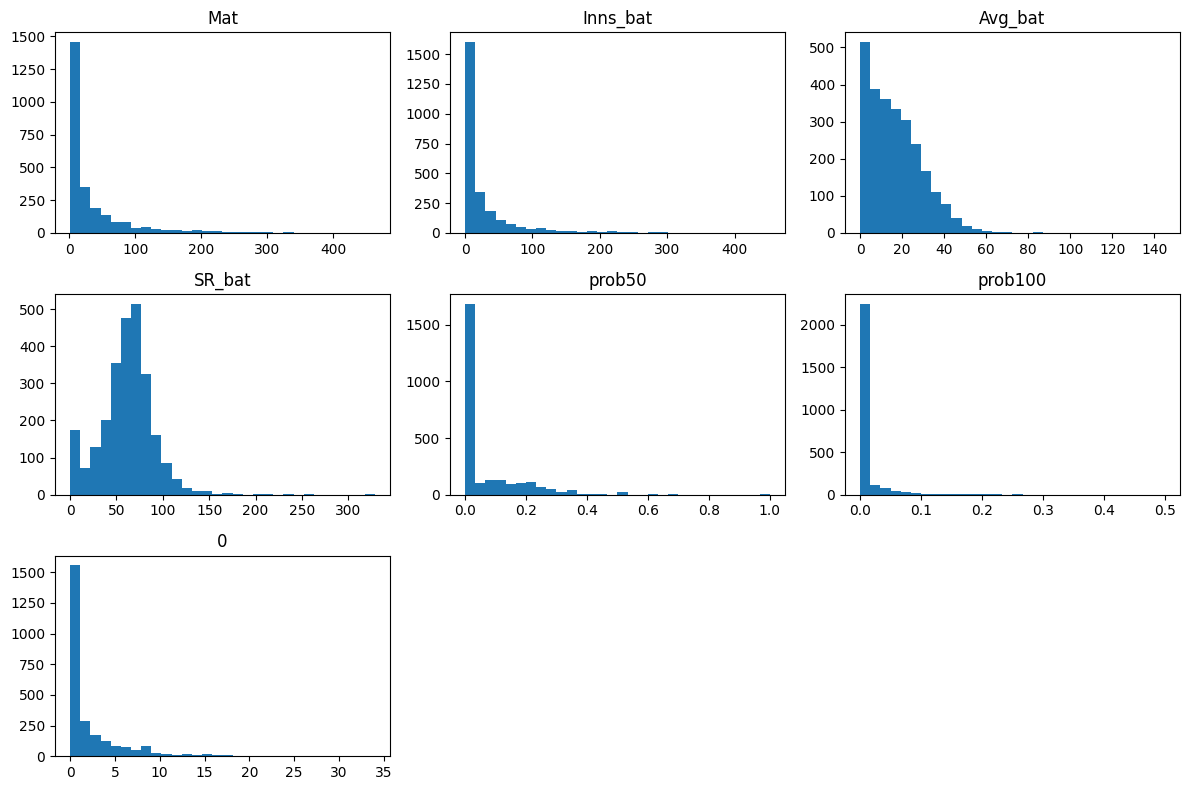

In [37]:
cols= ['Mat','Inns_bat','Avg_bat',"SR_bat","prob50","prob100","0"]
i=1
plt.figure(figsize=(12,8))
for c in cols:
    plt.subplot(3,3,i)
    plt.title(c)
    plt.hist(player_stats[c],bins=30)
    plt.tight_layout()
    i+=1
    
plt.show()

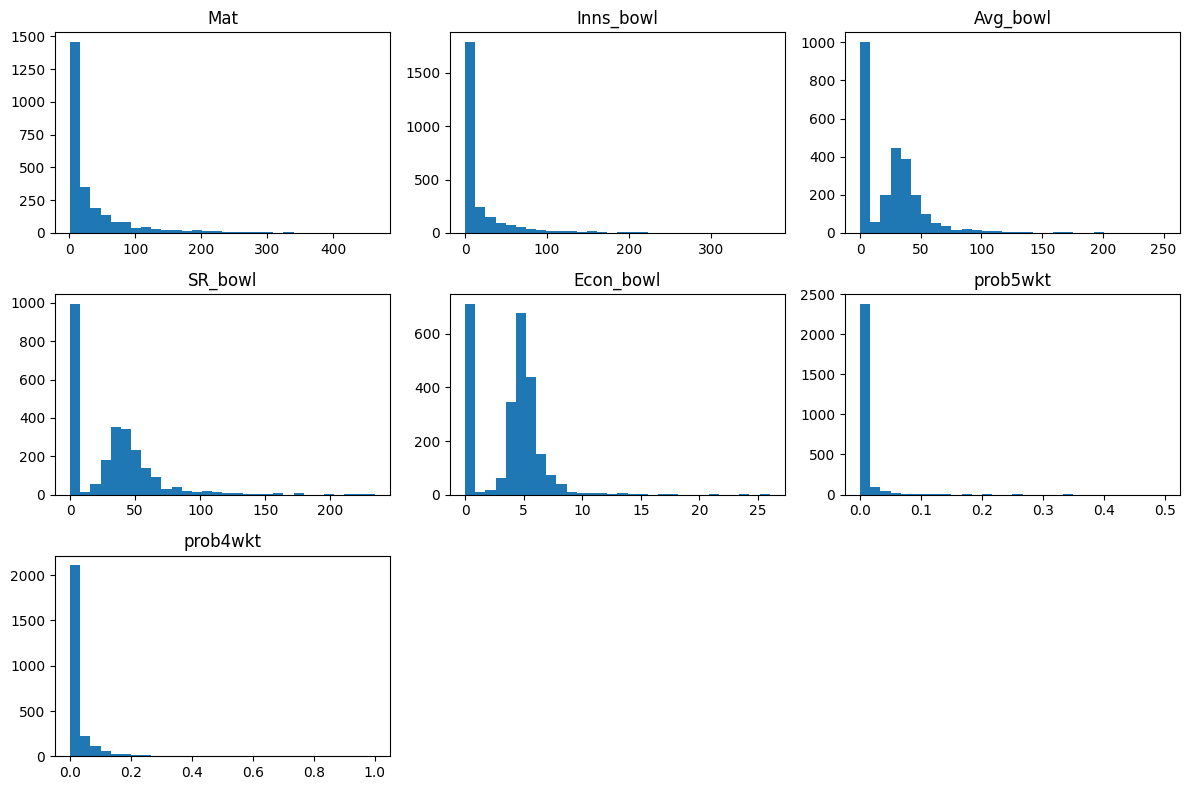

In [38]:
cols= ['Mat','Inns_bowl','Avg_bowl',"SR_bowl","Econ_bowl","prob5wkt","prob4wkt"]
i=1
plt.figure(figsize=(12,8))
for c in cols:
    plt.subplot(3,3,i)
    plt.title(c)
    plt.hist(player_stats[c],bins=30)
    plt.tight_layout()
    i+=1
plt.show()

In [39]:
player_stats.columns

Index(['pid', 'player_name', 'Mat', 'debut', 'retire', 'Country', 'Inns_bat',
       'NO', 'Runs_scored', 'HS', 'Avg_bat', 'BF', 'SR_bat', '100', '50', '0',
       'HS_no', 'Inns_bowl', 'Balls_bowled', 'Runs_given', 'Wkts_taken',
       'Avg_bowl', 'Econ_bowl', 'SR_bowl', '4wkt', '5wkt', 'BBwkts', 'BBruns',
       'prob50', 'prob100', 'prob4wkt', 'prob5wkt'],
      dtype='object')

In [40]:
#adding columns to calculate percentage of innings batted/bowled
player_stats['Inns_bat_pc']=(player_stats["Inns_bat"]/player_stats["Mat"])
player_stats['Inns_bowl_pc']=(player_stats["Inns_bowl"]/player_stats["Mat"])
player_stats

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,20.0,1.0,270,8054,6850,154,44.48,5.10,52.2,4,2,5,32,0.320796,0.108407,0.022222,0.007407,0.976242,0.583153
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,SL,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.310526,0.065789,0.000000,0.000000,0.940594,0.000000
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,0.0,5,150,104,3,34.66,4.16,50.0,0,0,1,12,0.306849,0.082192,0.000000,0.000000,0.973333,0.013333
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,SL,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,0.0,368,14874,11871,323,36.75,4.78,46.0,8,4,6,29,0.221709,0.064665,0.032609,0.010870,0.973034,0.826966
4,DPMDJayawardene19982015,DPMD Jayawardene,448,1998,2015,SL,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,0.0,28,593,563,8,70.37,5.69,74.1,0,0,2,56,0.229665,0.045455,0.000000,0.000000,0.933036,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,54,43,0,0.00,4.77,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,12,17,0,0.00,8.50,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Scaling and transforming columns before feeding to ML classification model

In [41]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

In [42]:
#tranformation

#log tranformation for skewed columns
cols_to_log_scale = ['Mat', 'Inns_bat', 'Inns_bat_pc', 'Avg_bat',"SR_bat",
                     'Inns_bowl', 'Inns_bowl_pc','Avg_bowl', 'Econ_bowl', 'SR_bowl',
                     'prob50', 'prob100', 'prob4wkt','prob5wkt']

for col in cols_to_log_scale:
    scaler = MinMaxScaler()
    player_stats[f"{col}_log"] = np.log1p(player_stats[col])
    player_stats[f"{col}_log_scaled"] = scaler.fit_transform(player_stats[[f"{col}_log"]])
    player_stats.drop(columns=[f"{col}_log"],inplace=True)
player_stats

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc,Mat_log_scaled,Inns_bat_log_scaled,Inns_bat_pc_log_scaled,Avg_bat_log_scaled,SR_bat_log_scaled,Inns_bowl_log_scaled,Inns_bowl_pc_log_scaled,Avg_bowl_log_scaled,Econ_bowl_log_scaled,SR_bowl_log_scaled,prob50_log_scaled,prob100_log_scaled,prob4wkt_log_scaled,prob5wkt_log_scaled
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,20.0,1.0,270,8054,6850,154,44.48,5.10,52.2,4,2,5,32,0.320796,0.108407,0.022222,0.007407,0.976242,0.583153,1.000000,1.000000,0.982760,0.767504,0.770733,0.946052,0.662801,0.690356,0.548658,0.727905,0.401408,0.253842,0.031709,0.018202
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,SL,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.310526,0.065789,0.000000,0.000000,0.940594,0.000000,0.975031,0.971698,0.956498,0.754621,0.755508,0.000000,0.000000,0.000000,0.000000,0.000000,0.390146,0.157143,0.000000,0.000000
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,0.0,5,150,104,3,34.66,4.16,50.0,0,0,1,12,0.306849,0.082192,0.000000,0.000000,0.973333,0.013333,0.961391,0.965130,0.980635,0.754854,0.758781,0.302581,0.019109,0.646365,0.497882,0.720169,0.386093,0.194809,0.000000,0.000000
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,SL,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,0.0,368,14874,11871,323,36.75,4.78,46.0,8,4,6,29,0.221709,0.064665,0.032609,0.010870,0.973034,0.826966,0.992736,0.992994,0.980416,0.703779,0.780291,0.998179,0.869450,0.656666,0.532309,0.705209,0.288901,0.154539,0.046294,0.026663
4,DPMDJayawardene19982015,DPMD Jayawardene,448,1998,2015,SL,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,0.0,28,593,563,8,70.37,5.69,74.1,0,0,2,56,0.229665,0.045455,0.000000,0.000000,0.933036,0.062500,0.993967,0.987243,0.950868,0.709764,0.755724,0.568648,0.087463,0.771848,0.576671,0.791053,0.298265,0.109632,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,54,43,0,0.00,4.77,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.531784,0.000000,0.000000,0.000000,0.000000,0.000000
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,12,17,0,0.00,8.50,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.683071,0.000000,0.000000,0.000000,0.000000,0.000000
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


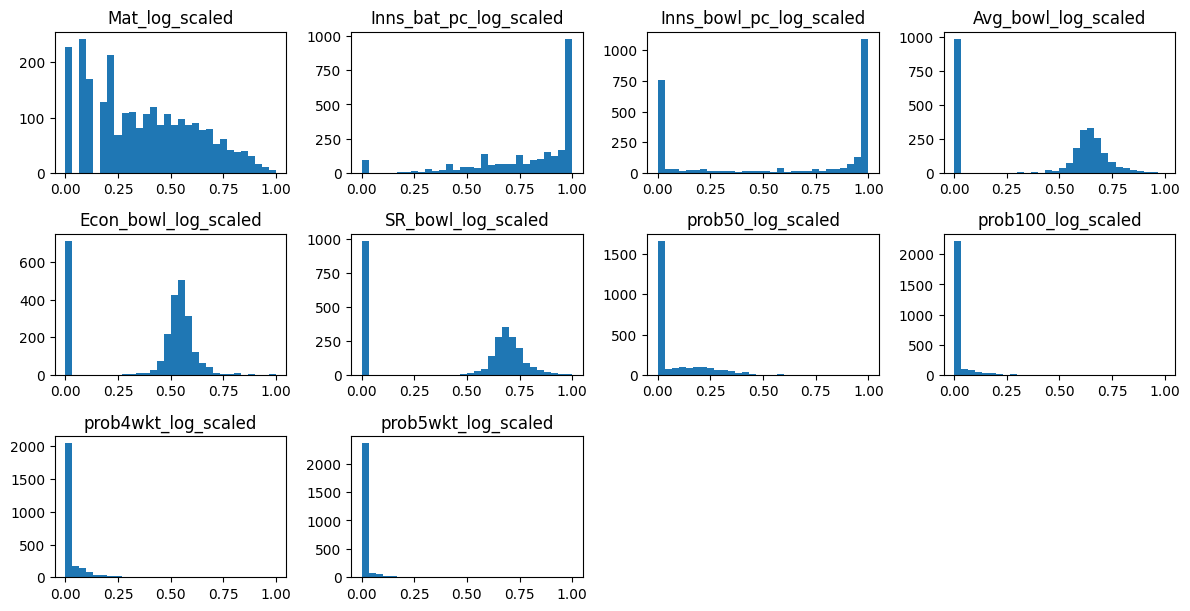

In [43]:
cols=  ['Mat_log_scaled', 'Inns_bat_pc_log_scaled', 'Inns_bowl_pc_log_scaled','Avg_bowl_log_scaled', 'Econ_bowl_log_scaled', 'SR_bowl_log_scaled',
        'prob50_log_scaled', 'prob100_log_scaled', 'prob4wkt_log_scaled','prob5wkt_log_scaled']
i=1
plt.figure(figsize=(12,8))
for c in cols:
    plt.subplot(4,4,i)
    plt.title(c)
    plt.hist(player_stats[c],bins=30)
    plt.tight_layout()
    i+=1
    
plt.show()

In [44]:
#weighted rating method

# player_stats["bat_rating"] = (
#     (0.35 * player_stats["Avg_bat_log_scaled"] +
#     0.35 * player_stats["SR_bat_log_scaled"] +
#     0.15 * player_stats["prob50_log_scaled"] +
#     0.15 * player_stats["prob100_log_scaled"]) *
#     player_stats["Inns_bat_log_scaled"]
# )
# player_stats.sort_values("bat_rating",ascending=False)

In [45]:
# player_stats["bowl_rating"] = (
#     (0.25 * (1-player_stats["Avg_bowl_log_scaled"]) +
#     0.25 * (1-player_stats["SR_bowl_log_scaled"]) +
#     0.25 * (1-player_stats["Econ_bowl_log_scaled"]) +
#     0.15 * player_stats["prob5wkt_log_scaled"] +
#     0.10 * player_stats["prob4wkt_log_scaled"])*
#     player_stats["Inns_bowl_log_scaled"]
# )
# player_stats.sort_values("bowl_rating",ascending=False)

In [46]:
player_stats["bat_rating"] = ((
    ( player_stats["Avg_bat_log_scaled"] +
    player_stats["SR_bat_log_scaled"] +
    player_stats["prob50_log_scaled"] +
    player_stats["prob100_log_scaled"]) *
    player_stats["Inns_bat_log_scaled"]
)/4)*100
player_stats.sort_values("bat_rating",ascending=False)

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc,Mat_log_scaled,Inns_bat_log_scaled,Inns_bat_pc_log_scaled,Avg_bat_log_scaled,SR_bat_log_scaled,Inns_bowl_log_scaled,Inns_bowl_pc_log_scaled,Avg_bowl_log_scaled,Econ_bowl_log_scaled,SR_bowl_log_scaled,prob50_log_scaled,prob100_log_scaled,prob4wkt_log_scaled,prob5wkt_log_scaled,bat_rating
6,VKohli20082019,V Kohli,242,2008,2019,INDIA,233.0,39.0,11609.0,183.0,59.84,12445.0,93.28,43.0,55.0,13.0,0.0,48,641,665,4,166.25,6.22,160.2,0,0,1,15,0.420601,0.184549,0.000000,0.000000,0.962810,0.198347,0.881246,0.891991,0.972920,0.824352,0.784138,0.657227,0.261046,0.925862,0.599804,0.930958,0.506501,0.417699,0.000000,0.000000,56.478445
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,20.0,1.0,270,8054,6850,154,44.48,5.10,52.2,4,2,5,32,0.320796,0.108407,0.022222,0.007407,0.976242,0.583153,1.000000,1.000000,0.982760,0.767504,0.770733,0.946052,0.662801,0.690356,0.548658,0.727905,0.401408,0.253842,0.031709,0.018202,54.837179
16,ABdeVilliers20052018,AB de Villiers,228,2005,2018,SA,218.0,39.0,9577.0,176.0,53.50,9473.0,101.09,25.0,53.0,7.0,0.0,9,192,202,7,28.85,6.31,27.4,0,0,2,15,0.357798,0.114679,0.000000,0.000000,0.956140,0.039474,0.870351,0.881159,0.968010,0.802271,0.797865,0.388847,0.055853,0.614202,0.603562,0.612938,0.441269,0.267758,0.000000,0.000000,50.868469
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,0.0,5,150,104,3,34.66,4.16,50.0,0,0,1,12,0.306849,0.082192,0.000000,0.000000,0.973333,0.013333,0.961391,0.965130,0.980635,0.754854,0.758781,0.302581,0.019109,0.646365,0.497882,0.720169,0.386093,0.194809,0.000000,0.000000,50.537550
28,HMAmla20082019,HM Amla,181,2008,2019,SA,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,27.0,39.0,4.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.370787,0.151685,0.000000,0.000000,0.983425,0.000000,0.828176,0.848181,0.987994,0.786816,0.774952,0.000000,0.000000,0.000000,0.000000,0.000000,0.455004,0.348307,0.000000,0.000000,50.150403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,54,43,0,0.00,4.77,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.531784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,12,17,0,0.00,8.50,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.683071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
player_stats["bowl_rating"] = (
    ((
    (1-player_stats["Avg_bowl_log_scaled"]) + #lesser the better
    (1-player_stats["SR_bowl_log_scaled"]) + #lesser the better
    (1-player_stats["Econ_bowl_log_scaled"]) + #lesser the better
    player_stats["prob5wkt_log_scaled"] +
    player_stats["prob4wkt_log_scaled"])* 
    player_stats["Inns_bowl_log_scaled"])/3)*100
player_stats.sort_values('bowl_rating',ascending=False)

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc,Mat_log_scaled,Inns_bat_log_scaled,Inns_bat_pc_log_scaled,Avg_bat_log_scaled,SR_bat_log_scaled,Inns_bowl_log_scaled,Inns_bowl_pc_log_scaled,Avg_bowl_log_scaled,Econ_bowl_log_scaled,SR_bowl_log_scaled,prob50_log_scaled,prob100_log_scaled,prob4wkt_log_scaled,prob5wkt_log_scaled,bat_rating,bowl_rating
506,MMuralitharan19932011,M Muralitharan,350,1993,2011,SL,162.0,63.0,674.0,33.0,6.80,869.0,77.56,0.0,0.0,25.0,1.0,341,18811,12326,534,23.08,3.93,35.2,15,10,7,30,0.000000,0.0,0.073314,0.029326,0.462857,0.974286,0.948759,0.832871,0.548789,0.412176,0.752677,0.985347,0.981331,0.575354,0.484047,0.657387,0.000000,0.0,0.102072,0.071285,24.254316,47.840887
397,WaqarYounis19892003,Waqar Younis,262,1989,2003,PAK,139.0,45.0,969.0,37.0,10.30,1445.0,67.05,0.0,0.0,15.0,0.0,258,12698,9919,416,23.84,4.68,30.5,14,13,7,36,0.000000,0.0,0.104651,0.050388,0.530534,0.984733,0.895767,0.808000,0.614035,0.486556,0.727906,0.938403,0.988945,0.580974,0.527014,0.631914,0.000000,0.0,0.143591,0.121242,24.532128,47.699997
120,WasimAkram19842003,Wasim Akram,356,1984,2003,PAK,280.0,55.0,3717.0,86.0,16.52,4208.0,88.33,0.0,6.0,28.0,0.0,351,18186,11812,502,23.52,3.89,36.2,17,6,5,15,0.021429,0.0,0.065527,0.017094,0.786517,0.985955,0.951870,0.921919,0.837150,0.574552,0.774836,0.990214,0.989833,0.578629,0.481575,0.662378,0.030588,0.0,0.091567,0.041803,31.805662,46.566078
349,BLee20002012,B Lee,221,2000,2012,AUS,110.0,44.0,1176.0,59.0,17.81,1407.0,83.58,0.0,3.0,16.0,0.0,217,11185,8877,380,23.36,4.76,29.4,14,9,5,22,0.027273,0.0,0.105991,0.041475,0.497738,0.981900,0.864652,0.770048,0.582785,0.588808,0.765412,0.909301,0.986885,0.577445,0.531257,0.625403,0.038819,0.0,0.145339,0.100225,26.817683,45.812334
1187,GDMcGrath19932007,GD McGrath,250,1993,2007,AUS,68.0,38.0,115.0,11.0,3.83,236.0,48.72,0.0,0.0,14.0,0.0,248,12970,8391,381,22.02,3.88,34.0,9,7,7,15,0.000000,0.0,0.064516,0.028226,0.272000,0.992000,0.887193,0.692312,0.347099,0.316005,0.673775,0.931754,0.994218,0.567213,0.480954,0.651212,0.000000,0.0,0.090198,0.068649,17.130931,45.328830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,JOTroughton20032003,JO Troughton,6,2003,2003,ENG,5.0,1.0,36.0,20.0,9.00,76.0,47.36,0.0,0.0,1.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.833333,0.000000,0.230002,0.292968,0.874469,0.462032,0.668992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.283838,0.000000
1697,BBhandari20192019,B Bhandari,3,2019,2019,NEPAL,3.0,0.0,35.0,21.0,11.66,77.0,45.45,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.127259,0.226671,1.000000,0.509360,0.662041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.638061,0.000000
1670,MohammadAslam19961996,Mohammad Aslam,4,1996,1996,UAE,4.0,0.0,38.0,23.0,9.50,73.0,52.05,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.168227,0.263157,1.000000,0.471822,0.684957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7.610352,0.000000
1708,MWAvanNierop20062006,MWA van Nierop,2,2006,2006,NL,2.0,1.0,35.0,31.0,35.00,49.0,71.42,0.0,0.0,0.0,1.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.074442,0.179632,1.000000,0.719061,0.738641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.546262,0.000000


In [48]:
###Combined/all rounder rating
player_stats["allrnd_rating"] = (player_stats["bowl_rating"]+player_stats["bat_rating"])/2
player_stats.sort_values("allrnd_rating",ascending=False)

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc,Mat_log_scaled,Inns_bat_log_scaled,Inns_bat_pc_log_scaled,Avg_bat_log_scaled,SR_bat_log_scaled,Inns_bowl_log_scaled,Inns_bowl_pc_log_scaled,Avg_bowl_log_scaled,Econ_bowl_log_scaled,SR_bowl_log_scaled,prob50_log_scaled,prob100_log_scaled,prob4wkt_log_scaled,prob5wkt_log_scaled,bat_rating,bowl_rating,allrnd_rating
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,20.0,1.0,270,8054,6850,154,44.48,5.10,52.2,4,2,5,32,0.320796,0.108407,0.022222,0.007407,0.976242,0.583153,1.000000,1.000000,0.982760,0.767504,0.770733,0.946052,0.662801,0.690356,0.548658,0.727905,0.401408,0.253842,0.031709,0.018202,54.837179,34.152197,44.494688
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,SL,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,0.0,368,14874,11871,323,36.75,4.78,46.0,8,4,6,29,0.221709,0.064665,0.032609,0.010870,0.973034,0.826966,0.992736,0.992994,0.980416,0.703779,0.780291,0.998179,0.869450,0.656666,0.532309,0.705209,0.288901,0.154539,0.046294,0.026663,47.850140,39.220902,43.535521
7,JHKallis19962014,JH Kallis,328,1996,2014,SA,314.0,53.0,11579.0,139.0,44.36,15885.0,72.89,17.0,86.0,17.0,0.0,283,10750,8680,273,31.79,4.84,39.3,2,2,5,30,0.328025,0.054140,0.014134,0.007067,0.957317,0.862805,0.936875,0.940594,0.968877,0.765436,0.742107,0.953964,0.897477,0.631191,0.535442,0.677039,0.409283,0.130037,0.020249,0.017368,48.131663,37.966037,43.048850
11,CHGayle19992019,CH Gayle,301,1999,2019,WI,294.0,17.0,10480.0,215.0,37.83,12019.0,87.19,25.0,54.0,25.0,0.0,199,7424,5926,167,35.48,4.78,44.4,3,1,5,46,0.268707,0.085034,0.020101,0.005025,0.976744,0.661130,0.921153,0.929868,0.983126,0.734246,0.772621,0.894747,0.732165,0.650477,0.532309,0.698865,0.343359,0.201278,0.028711,0.012362,47.690742,34.579704,41.135223
30,ShahidAfridi19962015,Shahid Afridi,398,1996,2015,PAK,369.0,27.0,8064.0,124.0,23.57,6892.0,117.00,6.0,39.0,30.0,0.0,372,17670,13632,395,34.51,4.62,44.7,4,9,7,12,0.121951,0.016260,0.034946,0.024194,0.927136,0.934673,0.972291,0.966908,0.946458,0.642411,0.822846,1.000000,0.952090,0.645603,0.523792,0.700071,0.166010,0.039780,0.049556,0.058958,40.393702,41.301622,40.847662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,RWTolchard19791979,RW Tolchard,1,1979,1979,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2483,SimandeepSingh20182018,Simandeep Singh,1,2018,2018,HKG,1.0,0.0,0.0,0.0,0.00,7.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.113335,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2487,RWalters20032003,R Walters,2,2003,2003,NAM,2.0,0.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,2.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.074442,0.179632,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2495,ZSAnsari20152015,ZS Ansari,1,2015,2015,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Assign player role

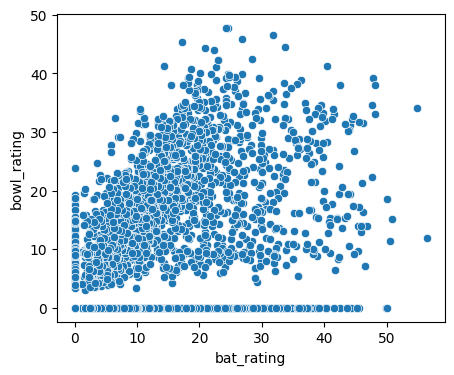

In [49]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=player_stats["bat_rating"],y=player_stats["bowl_rating"])
plt.show()

In [50]:
from sklearn.cluster import KMeans

In [51]:
X = player_stats[['Inns_bat_pc_log_scaled','Inns_bowl_pc_log_scaled']]
kmeans = KMeans(n_clusters=3,random_state=42)
player_stats["role"] = kmeans.fit_predict(X)

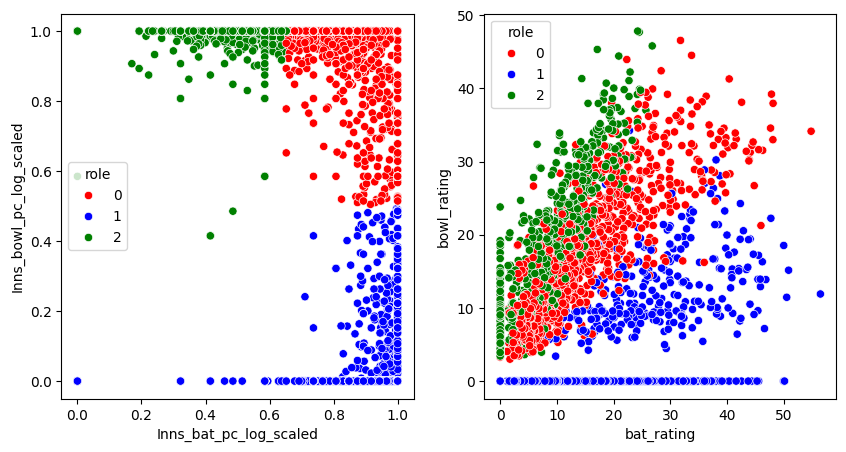

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=player_stats['Inns_bat_pc_log_scaled'],y=player_stats['Inns_bowl_pc_log_scaled']
                ,hue=player_stats["role"],palette=['red','blue','green'])

plt.subplot(1,2,2)
sns.scatterplot(x=player_stats['bat_rating'],y=player_stats['bowl_rating'],
                hue=player_stats["role"],palette=['red','blue','green'])
plt.show()

In [53]:
roles={
    0:"All-Rounder",
    1:"Batter",
    2:"Bowler"
}
player_stats["role"] = player_stats["role"].map(roles)

player_stats["role"].value_counts()

role
Batter         1018
All-Rounder     996
Bowler          568
Name: count, dtype: int64

In [54]:
player_stats["Batter_rank"] = player_stats["bat_rating"].rank(ascending=False,method='min').astype('int')
player_stats["Bowler_rank"] = player_stats["bowl_rating"].rank(ascending=False,method='min').astype('int')

In [55]:
player_stats

,pid,player_name,Mat,debut,retire,Country,Inns_bat,NO,Runs_scored,HS,Avg_bat,BF,SR_bat,100,50,0,HS_no,Inns_bowl,Balls_bowled,Runs_given,Wkts_taken,Avg_bowl,Econ_bowl,SR_bowl,4wkt,5wkt,BBwkts,BBruns,prob50,prob100,prob4wkt,prob5wkt,Inns_bat_pc,Inns_bowl_pc,Mat_log_scaled,Inns_bat_log_scaled,Inns_bat_pc_log_scaled,Avg_bat_log_scaled,SR_bat_log_scaled,Inns_bowl_log_scaled,Inns_bowl_pc_log_scaled,Avg_bowl_log_scaled,Econ_bowl_log_scaled,SR_bowl_log_scaled,prob50_log_scaled,prob100_log_scaled,prob4wkt_log_scaled,prob5wkt_log_scaled,bat_rating,bowl_rating,allrnd_rating,role,Batter_rank,Bowler_rank
0,SRTendulkar19892012,SR Tendulkar,463,1989,2012,INDIA,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,20.0,1.0,270,8054,6850,154,44.48,5.10,52.2,4,2,5,32,0.320796,0.108407,0.022222,0.007407,0.976242,0.583153,1.000000,1.000000,0.982760,0.767504,0.770733,0.946052,0.662801,0.690356,0.548658,0.727905,0.401408,0.253842,0.031709,0.018202,54.837179,34.152197,44.494688,All-Rounder,2,85
1,KCSangakkara20002015,KC Sangakkara,404,2000,2015,SL,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.310526,0.065789,0.000000,0.000000,0.940594,0.000000,0.975031,0.971698,0.956498,0.754621,0.755508,0.000000,0.000000,0.000000,0.000000,0.000000,0.390146,0.157143,0.000000,0.000000,49.979714,0.000000,24.989857,Batter,7,1874
2,RTPonting19952012,RT Ponting,375,1995,2012,AUS,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,0.0,5,150,104,3,34.66,4.16,50.0,0,0,1,12,0.306849,0.082192,0.000000,0.000000,0.973333,0.013333,0.961391,0.965130,0.980635,0.754854,0.758781,0.302581,0.019109,0.646365,0.497882,0.720169,0.386093,0.194809,0.000000,0.000000,50.537550,11.453554,30.995552,Batter,4,1236
3,STJayasuriya19892011,ST Jayasuriya,445,1989,2011,SL,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,0.0,368,14874,11871,323,36.75,4.78,46.0,8,4,6,29,0.221709,0.064665,0.032609,0.010870,0.973034,0.826966,0.992736,0.992994,0.980416,0.703779,0.780291,0.998179,0.869450,0.656666,0.532309,0.705209,0.288901,0.154539,0.046294,0.026663,47.850140,39.220902,43.535521,All-Rounder,10,23
4,DPMDJayawardene19982015,DPMD Jayawardene,448,1998,2015,SL,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,0.0,28,593,563,8,70.37,5.69,74.1,0,0,2,56,0.229665,0.045455,0.000000,0.000000,0.933036,0.062500,0.993967,0.987243,0.950868,0.709764,0.755724,0.568648,0.087463,0.771848,0.576671,0.791053,0.298265,0.109632,0.000000,0.000000,46.237139,16.309371,31.273255,Batter,16,891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,MWatkinson19961996,M Watkinson,1,1996,1996,ENG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,54,43,0,0.00,4.77,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.531784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.630525,4.815262,Bowler,2425,1392
2578,ZakirHasan19971997,Zakir Hasan,1,1997,1997,BDESH,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,12,17,0,0.00,8.50,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117054,1.000000,0.000000,0.683071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.040228,4.520114,Bowler,2425,1509
2579,RKaia20152015,R Kaia,1,2015,2015,ZIM,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Batter,2425,1874
2580,MohibullahOryakhel20132013,Mohibullah Oryakhel,2,2013,2013,AFG,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074442,0.000000,0.

In [56]:
# player_stats.columns

In [57]:
#selecting required columns from dataframe and saving as csv
player_stats = player_stats[['pid', 'player_name','Country','role', 'debut', 'retire','Mat', 'Inns_bat',
       'NO', 'Runs_scored', 'HS', 'Avg_bat', 'BF', 'SR_bat', '100', '50', '0',
       'HS_no', 'Inns_bowl', 'Balls_bowled', 'Runs_given', 'Wkts_taken',
       'Avg_bowl', 'Econ_bowl', 'SR_bowl', '4wkt', '5wkt', 'BBwkts', 'BBruns',
       'bat_rating', 'bowl_rating','allrnd_rating','Batter_rank',
       'Bowler_rank']].copy()

In [58]:
player_stats.to_csv(r"../processed_data/player_stats.csv",index=False)